# Demo notebook for weight-scale multi-digit recognition 



# Yuri Bakanouski, Helga Shiryaeva

# 02.10.2018

Import necessary dependencies

In [11]:
import cv2
from keras.models import model_from_json
from keras import backend as K
import keras
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

IMAGES_DIR = r"C:\Users\helga_sh\PycharmProjects\asl-alphabet\weight-scales\test"

In [2]:
json_file = open('new-model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("new-model.h5")
print("Loaded model from disk")
model.summary()

Loaded model from disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)        

# #Model is already trained, let's visualize test results

Reading the images

In [3]:
def read_images():
    images = []
    labels = []
    fig = plt.figure()
    row = 6
    col = 6
    for num, img in enumerate(os.listdir(IMAGES_DIR)):
        image = cv2.imread(os.path.join(IMAGES_DIR, img), cv2.IMREAD_GRAYSCALE)
        label = img.split('(')[0]
        labels.append(label)
        images.append(cv2.resize(image, (28, 28)))
        y = fig.add_subplot(row, col, num + 1)
        y.imshow(image, cmap='gray')
        y.get_xaxis().set_visible(False)
        y.get_yaxis().set_visible(False)
    if K.image_data_format() == 'channels_first':
        images = np.array(images).reshape(images.__len__(), 1, 28, 28)
    else:
        images = np.array(images).reshape(images.__len__(), 28, 28, 1)
    plt.show()
    return images, labels

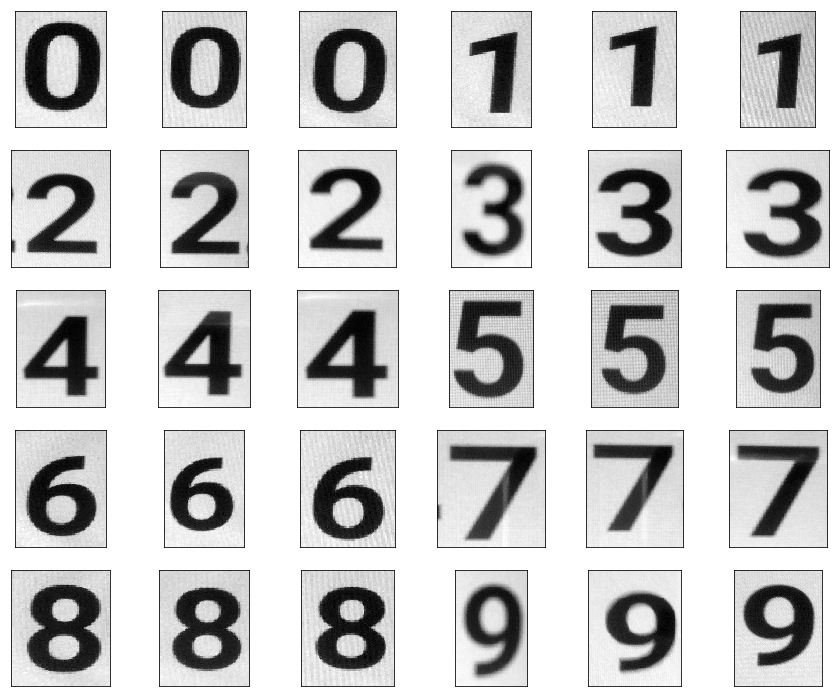

In [12]:
images, labels = read_images()

Prepare labels - one-hot encoding

In [5]:
labels = keras.utils.to_categorical(labels, 10)

Testing on untrained images

Images from the camera view :

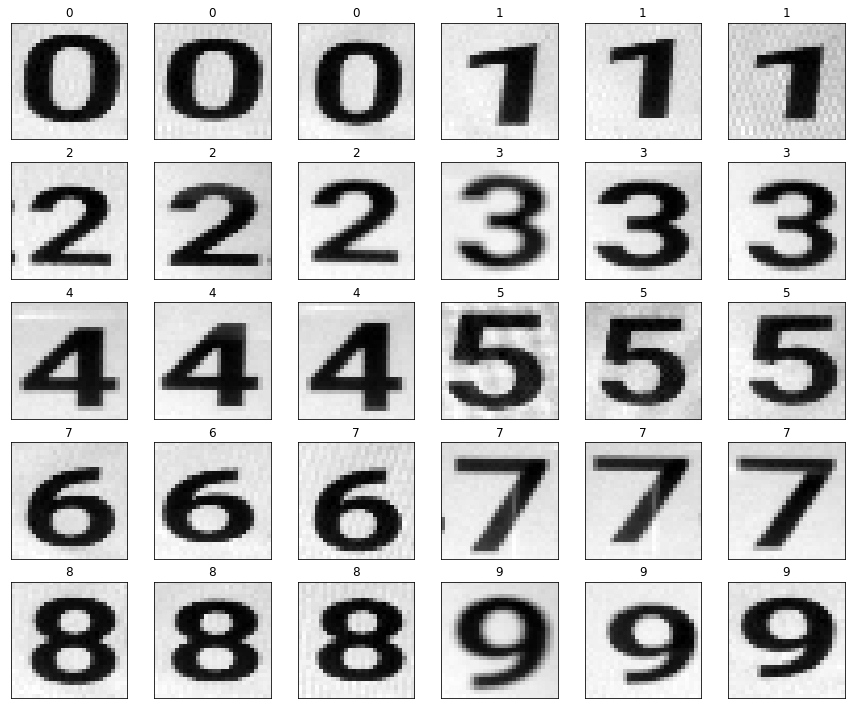

In [13]:
    answers = []
    for image in images:
        answer = model.predict(np.reshape(image, (1, 28, 28, 1)))
        answer0 = answer.argmax()
        answers.append((image, answer0))

    fig = plt.figure()
    row = 6
    col = 6
    for num, (image, label) in enumerate(answers):
        y = fig.add_subplot(row, col, num + 1)
        y.imshow(np.reshape(image, (28, 28)), cmap='gray')
        plt.title(label)
        y.get_xaxis().set_visible(False)
        y.get_yaxis().set_visible(False)
    plt.show()

#    How does it look live :

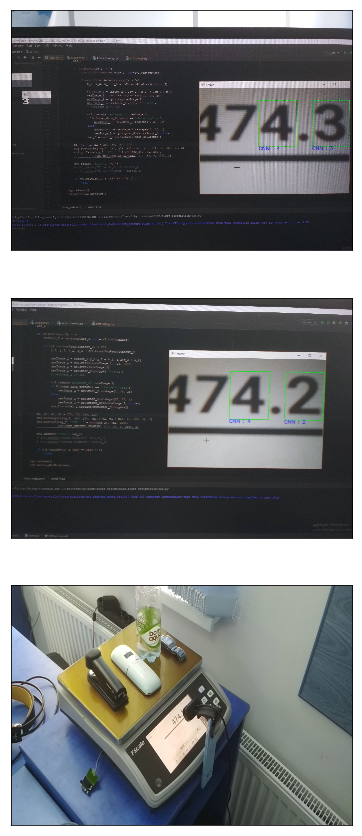

In [14]:
IMAGES_DIR_PHOTOS = r"C:\Users\helga_sh\PycharmProjects\asl-alphabet\weight-scales\images"
fig = plt.figure()
row = 3
col = 1
for num, img in enumerate(os.listdir(IMAGES_DIR_PHOTOS)):
    image = cv2.resize(cv2.imread(os.path.join(IMAGES_DIR_PHOTOS, img), cv2.IMREAD_COLOR), (1024, 720))
    y = fig.add_subplot(row, col, num + 1)
    y.imshow(image)
    y.get_xaxis().set_visible(False)
    y.get_yaxis().set_visible(False)
plt.show()